#### Diksha Acharya
# Machine Learning for Earth and Environmental Sciences SA23

#### Final Project

---

### Anomaly detection of extreme temperatures and precipitation in
India using ERA5 Land dataset

In [ ]:
#!pip install cartopy

In [109]:
# Import 
import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import os
from shapely.geometry import Point

In [ ]:
# mount to drive
#from google.colab import drive
#drive.mount('/content/drive')

---
Part 1 - Pre-processing and visualisation

In [110]:
# Indian states shapefile
shapefile_path = "Indian_States/India-States.shp"
Indian_states = gpd.read_file(shapefile_path)

1.1 - Temperature : 2m temperature xarray table

In [111]:
#ERA5 land data of 2 m temperature
Temperature_India_folder = 'ERA5_Data/India_temp_data_monthly'
temp_monthly = os.listdir(Temperature_India_folder)
temp_monthly

['2004_India_temp_monthly.nc',
 '2012_India_temp_monthly.nc',
 '2006_India_temp_monthly.nc',
 '2010_India_temp_monthly.nc',
 '2018_India_temp_monthly.nc',
 '2008_India_temp_monthly.nc',
 '2016_India_temp_monthly.nc',
 '2002_India_temp_monthly.nc',
 '2014_India_temp_monthly.nc',
 '2013_India_temp_monthly.nc',
 '2005_India_temp_monthly.nc',
 '2019_India_temp_monthly.nc',
 '2011_India_temp_monthly.nc',
 '2007_India_temp_monthly.nc',
 '2017_India_temp_monthly.nc',
 '2001_India_temp_monthly.nc',
 '2009_India_temp_monthly.nc',
 '2015_India_temp_monthly.nc',
 '2003_India_temp_monthly.nc']

In [112]:
# Example of the table for 2001
Temperature_India_folder_2001 = 'ERA5_Data/India_temp_data_monthly/2001_India_temp_monthly.nc'
temp_monthly_2001 = xr.open_dataset(Temperature_India_folder_2001)

In [113]:
temp_monthly_2001['t2m']

<xarray.DataArray 't2m' (month: 12, latitude: 124, longitude: 120)>
[178560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:      K
    long_name:  2 metre temperature

Temperature visualisation

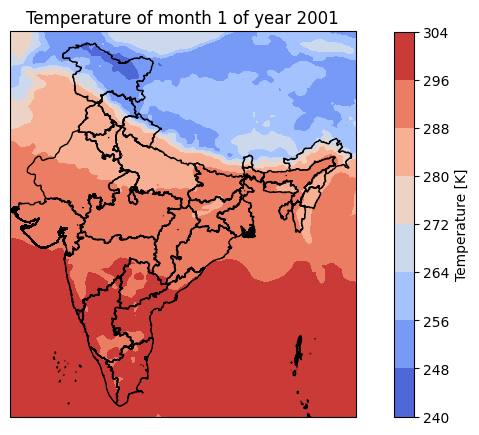

In [142]:
# plot of 2mt for 1st month of 2001

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

month = 0

ax.set_extent([min(temp_monthly_2001['longitude']), max(temp_monthly_2001['longitude']), min(temp_monthly_2001['latitude']), max(temp_monthly_2001['latitude'])], crs=ccrs.PlateCarree())
contour_2001 = ax.contourf(temp_monthly_2001['longitude'], temp_monthly_2001['latitude'], temp_monthly_2001['t2m'][month],
                transform=ccrs.PlateCarree(),
                cmap='coolwarm')
#ax.coastlines()
ax.set_title('Temperature of month {} of year 2001'.format(month+1))

# Plot Indian states on top of the temperature data
Indian_states.plot(ax=ax, facecolor='none', edgecolor='black')

# Add a colorbar
cbar = plt.colorbar(contour_2001,ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Temperature [K]')

# Save the plot to a file 
fig.savefig('m1_temp.png', dpi=300, bbox_inches='tight')

plt.show()

1.2 - Precipitation : mean total precipitation rate

In [115]:
#ERA5 land data of total precipitation 1990
Precipitation_India_folder = 'ERA5_Data/India_precipitation_data_monthly'
prec_monthly = os.listdir(Precipitation_India_folder)
prec_monthly

['2009_India_precipitation_monthly.nc',
 '2005_India_precipitation_monthly.nc',
 '2016_India_precipitation_monthly.nc',
 '2010_India_precipitation_monthly.nc',
 '2003_India_precipitation_monthly.nc',
 '2008_India_precipitation_monthly.nc',
 '2002_India_precipitation_monthly.nc',
 '2011_India_precipitation_monthly.nc',
 '2017_India_precipitation_monthly.nc',
 '2004_India_precipitation_monthly.nc',
 '2014_India_precipitation_monthly.nc',
 '2007_India_precipitation_monthly.nc',
 '2001_India_precipitation_monthly.nc',
 '2012_India_precipitation_monthly.nc',
 '2018_India_precipitation_monthly.nc',
 '2013_India_precipitation_monthly.nc',
 '2006_India_precipitation_monthly.nc',
 '2015_India_precipitation_monthly.nc',
 '2019_India_precipitation_monthly.nc']

In [116]:
# Example of the table for 2001
Precipitation_India_folder_2001 = 'ERA5_Data/India_precipitation_data_monthly/2001_India_precipitation_monthly.nc'
prec_monthly_2001 = xr.open_dataset(Precipitation_India_folder_2001)

In [117]:
prec_monthly_2001['mtpr']

<xarray.DataArray 'mtpr' (month: 12, latitude: 124, longitude: 120)>
[178560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:      kg m**-2 s**-1
    long_name:  Mean total precipitation rate

Precipitation visualisation

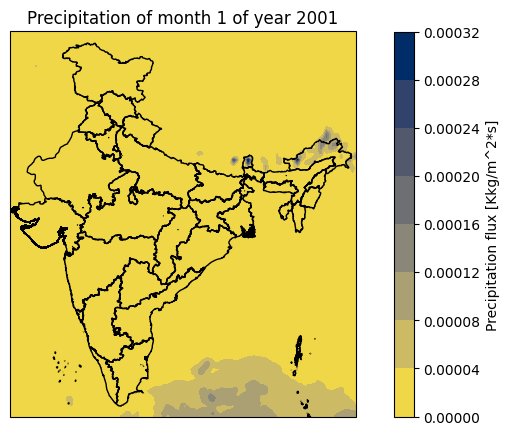

In [143]:
# plot of mtpr for 1st month of 2001

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

month = 0

ax.set_extent([min(prec_monthly_2001['longitude']), max(prec_monthly_2001['longitude']), min(prec_monthly_2001['latitude']), max(prec_monthly_2001['latitude'])], crs=ccrs.PlateCarree())
contour_2001 = ax.contourf(prec_monthly_2001['longitude'], prec_monthly_2001['latitude'], prec_monthly_2001['mtpr'][month],
                transform=ccrs.PlateCarree(),
                cmap='cividis_r')
#ax.coastlines()
ax.set_title('Precipitation of month {} of year 2001'.format(month+1))

# Plot Indian states on top of the temperature data
Indian_states.plot(ax=ax, facecolor='none', edgecolor='black')

# Add a colorbar
cbar = plt.colorbar(contour_2001,ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Precipitation flux [Kkg/m^2*s]')

# Save the plot to a file
fig.savefig('m1_prec.png', dpi=300, bbox_inches='tight')

plt.show()

---
Part 2 - Climatology over 19 years from 2001 to 2019 and anamoly calculation

2.1 - Temperature

In [121]:
# empty list
monthly_T = []

In [122]:
# Loop through each file
for file_T in temp_monthly:
    file_path_T = os.path.join(Temperature_India_folder, file_T)
    temp = xr.open_dataset(file_path_T)
    monthly_T.append(temp)

# concatenate along time dimension
Monthly_temperature_data = xr.concat(monthly_T, dim='time')

In [123]:
# Rename the 'time' dimension to 'year'
Monthly_temperature_data = Monthly_temperature_data.rename({'time': 'year'})

In [124]:
Monthly_temperature_data

<xarray.Dataset>
Dimensions:    (latitude: 124, longitude: 120, year: 19, month: 12)
Coordinates:
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: year
Data variables:
    t2m        (year, month, latitude, longitude) float32 279.1 278.0 ... 300.2

Temperature climatology (monthly)

In [125]:
# Calculate the climatology for the 19-year period
Temperature_climatology_monthly = Monthly_temperature_data.mean(dim='year')

In [126]:
Temperature_climatology_monthly

<xarray.Dataset>
Dimensions:    (latitude: 124, longitude: 120, month: 12)
Coordinates:
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m        (month, latitude, longitude) float32 276.8 276.2 ... 300.3 300.3

Temperature anomaly

In [127]:
# Subtract climatology from each corresponding monthly data
temperature_anomalies = Monthly_temperature_data - Temperature_climatology_monthly

In [128]:
temperature_anomalies

<xarray.Dataset>
Dimensions:    (latitude: 124, longitude: 120, month: 12, year: 19)
Coordinates:
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: year
Data variables:
    t2m        (year, month, latitude, longitude) float32 2.295 ... -0.1007

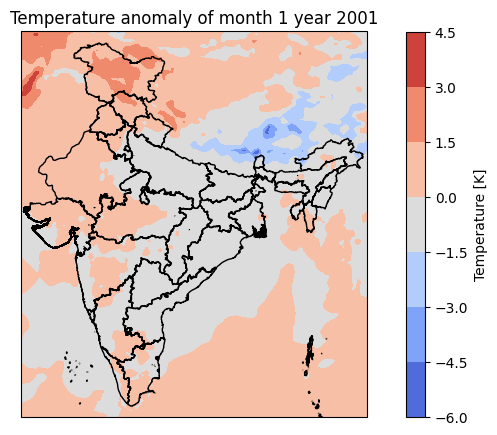

In [144]:
# plot of 2mt anomaly for 1st month of 2001

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

month = 0
year = 0

ax.set_extent([min(temperature_anomalies['longitude']), max(temperature_anomalies['longitude']), min(temperature_anomalies['latitude']), max(temperature_anomalies['latitude'])], crs=ccrs.PlateCarree())
contour_2001 = ax.contourf(temperature_anomalies['longitude'], temperature_anomalies['latitude'], temperature_anomalies['t2m'][month][year],
                transform=ccrs.PlateCarree(),
                cmap='coolwarm')
#ax.coastlines()
ax.set_title('Temperature anomaly of month {} year 2001'.format(month+1))

# Plot Indian states on top of the temperature data
Indian_states.plot(ax=ax, facecolor='none', edgecolor='black')

# Add a colorbar
cbar = plt.colorbar(contour_2001,ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Temperature [K]')

# Save the plot to a file
fig.savefig('m1_temp_anomaly.png', dpi=300, bbox_inches='tight')

plt.show()

2.2 - Precipitation

In [145]:
# empty list
monthly_P = []

In [146]:
# Loop through each file
for file_P in prec_monthly:
    file_path_P = os.path.join(Precipitation_India_folder, file_P)
    prec = xr.open_dataset(file_path_P)
    monthly_P.append(prec)

# concatenate along time dimension
Monthly_Precipitation_data = xr.concat(monthly_P, dim='time')

In [147]:
# Rename the 'time' dimension to 'year'
Monthly_Precipitation_data = Monthly_Precipitation_data.rename({'time': 'year'})

Monthly precipitation data over 19 years

In [148]:
Monthly_Precipitation_data

<xarray.Dataset>
Dimensions:    (latitude: 124, longitude: 120, year: 19, month: 12)
Coordinates:
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: year
Data variables:
    mtpr       (year, month, latitude, longitude) float32 1.531e-05 ... 3.566...

Precipitation climatology (monthly)

In [149]:
# Calculate the climatology for the 18-year period
Precipitation_climatology_monthly = Monthly_Precipitation_data.mean(dim='year')

In [150]:
Precipitation_climatology_monthly

<xarray.Dataset>
Dimensions:    (latitude: 124, longitude: 120, month: 12)
Coordinates:
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mtpr       (month, latitude, longitude) float32 1.375e-05 ... 7.848e-05

Precipitation anomaly

In [151]:
# Subtract climatology from each corresponding monthly data
precipitation_anomalies = Monthly_Precipitation_data - Precipitation_climatology_monthly

In [152]:
precipitation_anomalies

<xarray.Dataset>
Dimensions:    (latitude: 124, longitude: 120, month: 12, year: 19)
Coordinates:
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: year
Data variables:
    mtpr       (year, month, latitude, longitude) float32 1.558e-06 ... -4.28...

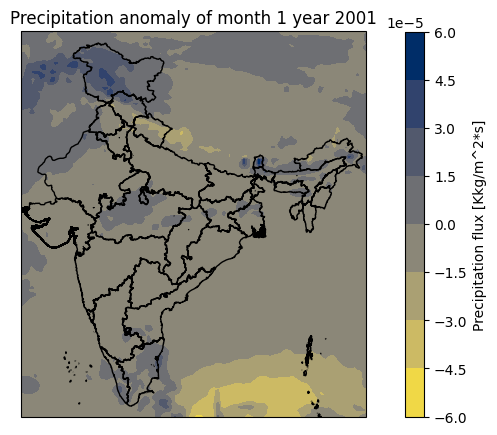

In [153]:
# plot of mtpr anomaly for 1st month of 2001

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

month = 0
year = 0

ax.set_extent([min(precipitation_anomalies['longitude']), max(precipitation_anomalies['longitude']), min(precipitation_anomalies['latitude']), max(precipitation_anomalies['latitude'])], crs=ccrs.PlateCarree())
contour_2001 = ax.contourf(precipitation_anomalies['longitude'], precipitation_anomalies['latitude'], precipitation_anomalies['mtpr'][month][year],
                transform=ccrs.PlateCarree(),
                cmap='cividis_r')
#ax.coastlines()
ax.set_title('Precipitation anomaly of month {} year 2001'.format(month+1))

# Plot Indian states on top of the temperature data
Indian_states.plot(ax=ax, facecolor='none', edgecolor='black')

# Add a colorbar
cbar = plt.colorbar(contour_2001,ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Precipitation flux [Kkg/m^2*s]')

# Save the plot to a file
fig.savefig('m1_prec_anomaly.png', dpi=300, bbox_inches='tight')

plt.show()

---
Part 3 - Standardization

In [157]:
# import for standardization
from sklearn.preprocessing import StandardScaler

3.1 - Temperature anomaly standardization

In [158]:
# Extracting temperature
temp_data = temperature_anomalies['t2m'].values

# Reshape for standardization, keeping the dimensions intact
temp_data_reshaped = temp_data.reshape(-1, temp_data.shape[-1])

In [159]:
# Standardize temperature and precipitation data separately
scaler_temp = StandardScaler()
scaled_temp = scaler_temp.fit_transform(temp_data_reshaped)

In [160]:
# Reshape the standardized data back to the original shape
scaled_temp = scaled_temp.reshape(temp_data.shape)

In [161]:
scaled_temp.shape

(19, 12, 124, 120)

3.2 - Precipitation anomaly standardization

In [162]:
# Extracting temperature
prec_data = precipitation_anomalies['mtpr'].values

# Reshape the data for standardization
prec_data_reshaped = prec_data.reshape(-1, temp_data.shape[-1])

In [163]:
# Standardize temperature and precipitation data separately
scaler_prec = StandardScaler()
scaled_prec = scaler_prec.fit_transform(prec_data_reshaped)

In [164]:
# Reshape the standardized data back to the original shape
scaled_prec = scaled_prec.reshape(prec_data.shape)

In [165]:
scaled_prec.shape

(19, 12, 124, 120)

3.3 - Resample data 2D and Anomaly scatter plot --> understanding outliers at specific locations over time

In [166]:
from scipy import stats

In [167]:
# Flatten the arrays for plotting -->(19*12, 124, 120)
flattened_temperature_all = scaled_temp.reshape((-1, scaled_temp.shape[-2], scaled_temp.shape[-1]))
flattened_precipitation_all = scaled_prec.reshape((-1, scaled_prec.shape[-2], scaled_prec.shape[-1]))

In [168]:
flattened_temperature_all.shape

(228, 124, 120)

In [169]:
# Reshape the arrays to align temperature and precipitation anomalies (19*12*124, 120) --> understanding outliers at specific locations over time
temperature_2D_all = flattened_temperature_all.reshape((-1, flattened_temperature_all.shape[-1]))
precipitation_2D_all = flattened_precipitation_all.reshape((-1, flattened_precipitation_all.shape[-1]))

In [170]:
temperature_2D_all.shape

(28272, 120)

---
Part 4 - Ground truth

In [173]:
threshold_temp_max = np.percentile(temperature_2D_all, 99.95)  # Highest 0.05%
threshold_temp_min = np.percentile(temperature_2D_all, 0.05)   # Lowest0.05%
threshold_precip_max = np.percentile(precipitation_2D_all, 99.95)  # Highest 0.05%
threshold_precip_min = np.percentile(precipitation_2D_all, 0.05)   # Lowest 0.05%

# Highlight outliers for temperature and precipitation separately
outliers_temp_high = (temperature_2D_all > threshold_temp_max) 
outliers_temp_low = (temperature_2D_all < threshold_temp_min)
outliers_precip_high = (precipitation_2D_all > threshold_precip_max)
outliers_precip_low = (precipitation_2D_all < threshold_precip_min) 

# Combine outliers for both dimensions
#outliers_all = np.logical_or(outliers_temp, outliers_precip)

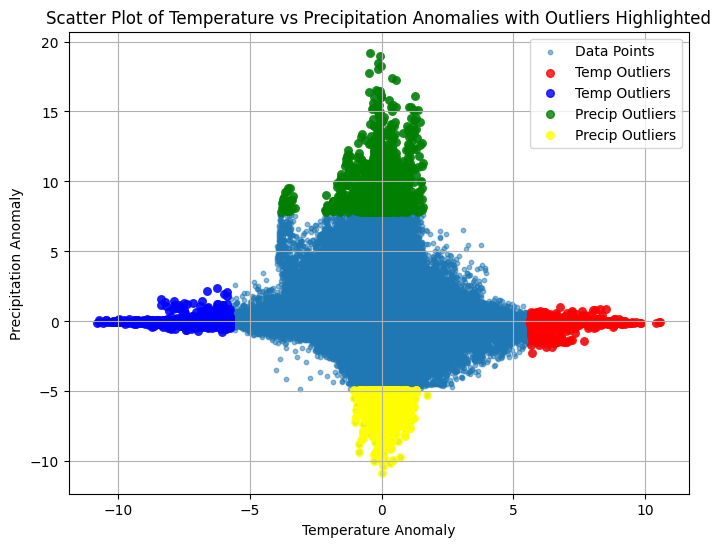

In [174]:
# Create scatter plot for all points
fig = plt.figure(figsize=(8, 6))

# Plot all points
plt.scatter(temperature_2D_all, precipitation_2D_all, s=10, alpha=0.5, label='Data Points')

# Plot outliers for temperature in red and blue
plt.scatter(temperature_2D_all[outliers_temp_high], precipitation_2D_all[outliers_temp_high], color='red', s=30, alpha=0.8, label='Temp Outliers')
plt.scatter(temperature_2D_all[outliers_temp_low], precipitation_2D_all[outliers_temp_low], color='blue', s=30, alpha=0.8, label='Temp Outliers')

# Plot outliers for precipitation in green and yellow
plt.scatter(temperature_2D_all[outliers_precip_high], precipitation_2D_all[outliers_precip_high], color='green', s=30, alpha=0.8, label='Precip Outliers')
plt.scatter(temperature_2D_all[outliers_precip_low], precipitation_2D_all[outliers_precip_low], color='yellow', s=30, alpha=0.8, label='Precip Outliers')

plt.xlabel('Temperature Anomaly')
plt.ylabel('Precipitation Anomaly')
plt.title('Scatter Plot of Temperature vs Precipitation Anomalies with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.show()

# Save the plot to a file
fig.savefig('temp_prec_threshold_outliers.png', dpi=300, bbox_inches='tight')

In [175]:
# Extract all coordinates from temperature anomalies
latitudes = temperature_anomalies['latitude'].values  
longitudes = temperature_anomalies['longitude'].values  

# Reshape the latitude and longitude arrays for pairing all combinations
latitudes_mesh, longitudes_mesh = np.meshgrid(latitudes, longitudes)

# Reshape the meshes to 1D arrays for comparison
latitudes_1d = latitudes_mesh.ravel()
longitudes_1d = longitudes_mesh.ravel()

In [176]:
# Indices of outliers
outlier_temp_indices_temp_high = np.where(outliers_temp_high)
outlier_temp_indices_temp_low = np.where(outliers_temp_low)

outlier_precip_indices_precip_high = np.where(outliers_precip_high)
outlier_precip_indices_precip_low = np.where(outliers_precip_low)

In [177]:
# Get the coordinates for the outliers from gmm_outliers
valid_indices_temp_high = outlier_temp_indices_temp_high[0][(outlier_temp_indices_temp_high[0] < len(latitudes_1d))]
valid_indices_temp_low = outlier_temp_indices_temp_low[0][(outlier_temp_indices_temp_low[0] < len(latitudes_1d))]

valid_indices_precip_high = outlier_precip_indices_precip_high[0][(outlier_precip_indices_precip_high[0] < len(latitudes_1d))]
valid_indices_precip_low = outlier_precip_indices_precip_low[0][(outlier_precip_indices_precip_low[0] < len(latitudes_1d))]

# high temp
outlier_coordinates_latitudes_temp_high = latitudes_1d[valid_indices_temp_high]
outlier_coordinates_longitudes_temp_high = longitudes_1d[valid_indices_temp_high]

# low temp
outlier_coordinates_latitudes_temp_low = latitudes_1d[valid_indices_temp_low]
outlier_coordinates_longitudes_temp_low = longitudes_1d[valid_indices_temp_low]

# high precip
outlier_coordinates_latitudes_precip_high = latitudes_1d[valid_indices_precip_high]
outlier_coordinates_longitudes_precip_high = longitudes_1d[valid_indices_precip_high]

# low precip
outlier_coordinates_latitudes_precip_low = latitudes_1d[valid_indices_precip_low]
outlier_coordinates_longitudes_precip_low = longitudes_1d[valid_indices_precip_low]

In [178]:
# Create a list of Point objects from the outlier coordinates
outlier_points_temp_high = [Point(lon, lat) for lon, lat in zip(outlier_coordinates_longitudes_temp_high, outlier_coordinates_latitudes_temp_high)]
outlier_points_temp_low = [Point(lon, lat) for lon, lat in zip(outlier_coordinates_longitudes_temp_low, outlier_coordinates_latitudes_temp_low)]

outlier_points_precip_high = [Point(lon, lat) for lon, lat in zip(outlier_coordinates_longitudes_precip_high, outlier_coordinates_latitudes_precip_high)]
outlier_points_precip_low = [Point(lon, lat) for lon, lat in zip(outlier_coordinates_longitudes_precip_low, outlier_coordinates_latitudes_precip_low)]

# Convert the outlier points to a GeoDataFrame
outlier_points_gdf_temp_high = gpd.GeoDataFrame(geometry=outlier_points_temp_high, crs=Indian_states.crs)
outlier_points_gdf_temp_low = gpd.GeoDataFrame(geometry=outlier_points_temp_low, crs=Indian_states.crs)

outlier_points_gdf_precip_high = gpd.GeoDataFrame(geometry=outlier_points_precip_high, crs=Indian_states.crs)
outlier_points_gdf_precip_low = gpd.GeoDataFrame(geometry=outlier_points_precip_low, crs=Indian_states.crs)

# Perform a spatial join between Indian_states and the outlier points GeoDataFrame
outliers_within_states_temp_high = gpd.sjoin(outlier_points_gdf_temp_high, Indian_states, op='within')
outliers_within_states_temp_low = gpd.sjoin(outlier_points_gdf_temp_low, Indian_states, op='within')

outliers_within_states_precip_high = gpd.sjoin(outlier_points_gdf_precip_high, Indian_states, op='within')
outliers_within_states_precip_low = gpd.sjoin(outlier_points_gdf_precip_low, Indian_states, op='within')

# Extract the coordinates of outliers within Indian states
outlier_within_latitudes_temp_high = outliers_within_states_temp_high.geometry.y.values
outlier_within_longitudes_temp_high = outliers_within_states_temp_high.geometry.x.values
outlier_within_latitudes_temp_low = outliers_within_states_temp_low.geometry.y.values
outlier_within_longitudes_temp_low = outliers_within_states_temp_low.geometry.x.values

outlier_within_latitudes_precip_high = outliers_within_states_precip_high.geometry.y.values
outlier_within_longitudes_precip_high = outliers_within_states_precip_high.geometry.x.values
outlier_within_latitudes_precip_low = outliers_within_states_precip_low.geometry.y.values
outlier_within_longitudes_precip_low = outliers_within_states_precip_low.geometry.x.values

/Users/shakidi/opt/anaconda3/envs/imports_TM/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


/Users/shakidi/opt/anaconda3/envs/imports_TM/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/shakidi/opt/anaconda3/envs/imports_TM/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/shakidi/opt/anaconda3/envs/imports_TM/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


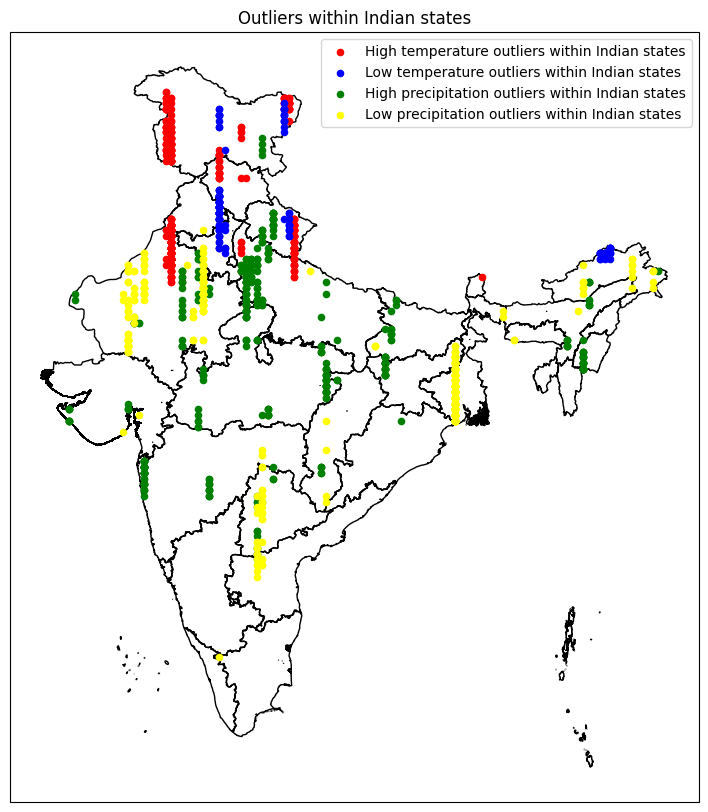

In [179]:
# Plot outliers within Indian states on the map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot Indian states
Indian_states.plot(ax=ax, facecolor='none', edgecolor='black')

# Plot outliers within Indian states on the map
ax.scatter(outlier_within_longitudes_temp_high, outlier_within_latitudes_temp_high, color='red', s=20, label='High temperature outliers within Indian states')
ax.scatter(outlier_within_longitudes_temp_low, outlier_within_latitudes_temp_low, color='blue', s=20, label='Low temperature outliers within Indian states')

ax.scatter(outlier_within_longitudes_precip_high, outlier_within_latitudes_precip_high, color='green', s=20, label='High precipitation outliers within Indian states')
ax.scatter(outlier_within_longitudes_precip_low, outlier_within_latitudes_precip_low, color='yellow', s=20, label='Low precipitation outliers within Indian states')

ax.set_title('Outliers within Indian states')
ax.legend()
plt.show()

# Save the plot to a file 
fig.savefig('all_outliers_India.png', dpi=300, bbox_inches='tight')

In [181]:
temp_tot_high = len(outliers_within_states_temp_high)
temp_tot_low = len(outliers_within_states_temp_low)

precip_tot_high = len(outliers_within_states_precip_high)
precip_tot_low = len(outliers_within_states_precip_low)

print("Total high temperature outliers:",temp_tot_high)
print("Total low temperature outliers:",temp_tot_low)
print("Total high precipitation outliers:", precip_tot_high)
print("Total low precipitation outliers:", precip_tot_low)

print("Total outliers:", temp_tot_high+temp_tot_low+precip_tot_high+precip_tot_low)

Total high temperature outliers: 337
Total low temperature outliers: 125
Total high precipitation outliers: 427
Total low precipitation outliers: 388
Total outliers: 1277


---
Part 5 - Split data : train, test and validation

In [186]:
# Extracting the total number of years from the data
total_years = scaled_temp.shape[0]
train_percentage = 0.7

train_years = int(total_years * train_percentage)
remaining_years = total_years - train_years

In [187]:
# Split the remaining years into test and validation sets
test_years = remaining_years // 2  # First half of the remaining years
valid_years = remaining_years - test_years  # Second half of the remaining years

In [188]:
# Define indices for the test and validation sets
test_indices = slice(train_years, train_years + test_years)
valid_indices = slice(train_years + test_years, None)

5.1 - Temperature anomalies split

In [189]:
# split into train, test and validation
train_temp = scaled_temp[:train_years, :, :, :]
test_temp = scaled_temp[test_indices, :, :, :]
valid_temp = scaled_temp[valid_indices, :, :, :]

In [190]:
print(train_temp.shape)
print(test_temp.shape)
print(valid_temp.shape)

(13, 12, 124, 120)
(3, 12, 124, 120)
(3, 12, 124, 120)


5.2 - Precipitation anomalies split

In [191]:
# split into train, test and validation
train_prec = scaled_prec[:train_years, :, :, :]
test_prec = scaled_prec[test_indices, :, :,:]
valid_prec = scaled_prec[valid_indices, :, :, :]

In [192]:
print(train_prec.shape)
print(test_prec.shape)
print(valid_prec.shape)

(13, 12, 124, 120)
(3, 12, 124, 120)
(3, 12, 124, 120)


4.3 - Resample to 2D array the sub-sets

In [193]:
# Flatten the training arrays -->(13*12, 124, 120)
flattened_temperature_train = train_temp.reshape((-1, train_temp.shape[-2], train_temp.shape[-1]))
flattened_precipitation_train = train_prec.reshape((-1, train_prec.shape[-2], train_prec.shape[-1]))

# Flatten the testing arrays -->(3*12, 124, 120)
flattened_temperature_test = test_temp.reshape((-1, test_temp.shape[-2], test_temp.shape[-1]))
flattened_precipitation_test = test_prec.reshape((-1, test_prec.shape[-2], test_prec.shape[-1]))

# Flatten the validation arrays -->(3*12, 124, 120)
flattened_temperature_val = valid_temp.reshape((-1, valid_temp.shape[-2], valid_temp.shape[-1]))
flattened_precipitation_val = valid_prec.reshape((-1, valid_prec.shape[-2], valid_prec.shape[-1]))

In [194]:
# Reshape the training arrays to align temperature and precipitation anomalies (13*12*124, 120) --> understanding outliers at specific locations over time
temperature_2D_train = flattened_temperature_train.reshape((-1, flattened_temperature_train.shape[-1]))
precipitation_2D_train = flattened_precipitation_train.reshape((-1, flattened_precipitation_train.shape[-1]))

temperature_2D_test = flattened_temperature_test.reshape((-1, flattened_temperature_test.shape[-1]))
precipitation_2D_test = flattened_precipitation_test.reshape((-1, flattened_precipitation_test.shape[-1]))

temperature_2D_val = flattened_temperature_val.reshape((-1, flattened_temperature_val.shape[-1]))
precipitation_2D_val = flattened_precipitation_val.reshape((-1, flattened_precipitation_val.shape[-1]))

In [195]:
combined_data_train = np.concatenate((temperature_2D_train, precipitation_2D_train), axis=0)
combined_data_test = np.concatenate((temperature_2D_test, precipitation_2D_test), axis=0)
combined_data_val = np.concatenate((temperature_2D_val, precipitation_2D_val), axis=0)

---
Part 6 - Baseline : GMM model combined (T,P)

In [198]:
# Imports for GMM and K clusters
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

6.1 - Tune the hyperparameters with validation set - n_components & covariance_type

6.1.1 - Using validation set to tune the hyperparameter n_components

In [73]:
n_cluster_range = range(2, 11)
silhouette_scores = []

for n in n_cluster_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(combined_data_train)
    validation_predicted_labels = gmm.predict(combined_data_val)
    score = silhouette_score(combined_data_val, validation_predicted_labels)
    silhouette_scores.append(score)
    print(f"n_components={n}, Silhouette Score: {score}")

best_n_components = n_cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best n_components: {best_n_components}, Best Silhouette Score: {max(silhouette_scores)}")

/Users/shakidi/opt/anaconda3/envs/imports_TM/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


KeyboardInterrupt: 

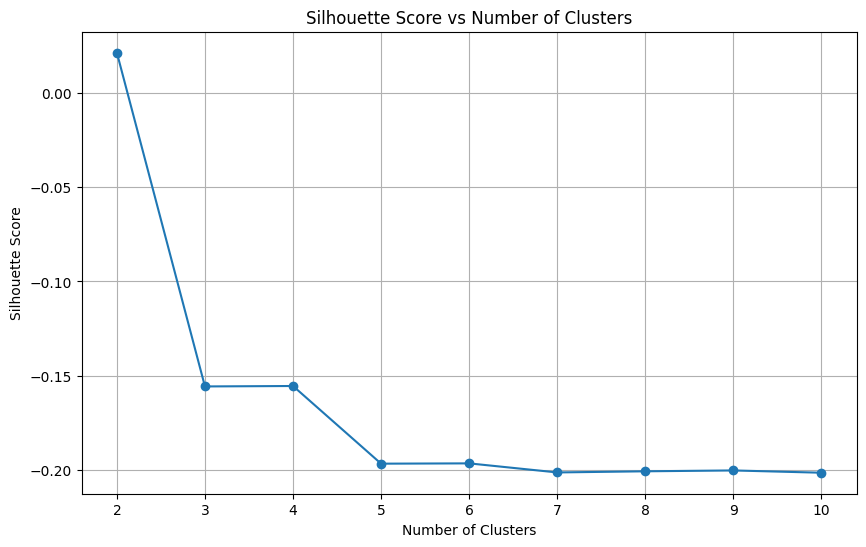

In [135]:
# Plotting the silhouette scores
fig = plt.figure(figsize=(10, 6))
plt.plot(n_cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

# Save the plot to a file 
fig.savefig('K_clusters_gmm_SS.png', dpi=300, bbox_inches='tight')

6.1.2 - Using validation set to tune the hyperparameter covariance_type

In [200]:
# Define covariance_type hyperparameters to tune
covariance_types = ['full', 'tied', 'diag', 'spherical']
silhouette_scores_2 = []

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=2, covariance_type=cov_type, random_state=42)
    gmm.fit(combined_data_train)
    validation_predicted_labels = gmm.predict(combined_data_val)
    score = silhouette_score(combined_data_val, validation_predicted_labels)
    silhouette_scores_2.append(score)
    print(f"Covariance Type={cov_type}, Silhouette Score: {score}")

best_covariance_type = covariance_types[silhouette_scores_2.index(max(silhouette_scores_2))]
print(f"Best Covariance Type: {best_covariance_type}, Best Silhouette Score: {max(silhouette_scores_2)}")

Covariance Type=full, Silhouette Score: 0.02141234651207924
Covariance Type=tied, Silhouette Score: 0.5034929513931274
Covariance Type=diag, Silhouette Score: 0.15516731142997742
Covariance Type=spherical, Silhouette Score: 0.1565903127193451
Best Covariance Type: tied, Best Silhouette Score: 0.5034929513931274


6.2 - Train the model for clustering

In [201]:
gmm = GaussianMixture(n_components=2, covariance_type='tied', random_state=42)
gmm.fit(combined_data_train)

GaussianMixture(covariance_type='tied', n_components=2, random_state=42)

In [202]:
# Predict clusters for the train and test data
train_predicted_labels = gmm.predict(combined_data_train)

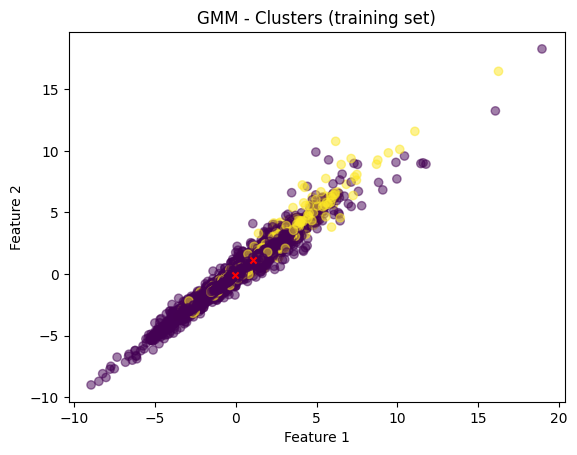

In [205]:
# Get cluster centers
train_cluster_centers = gmm.means_

# Plotting clusters for train data
plt.scatter(combined_data_train[:, 0], combined_data_train[:, 1], c=train_predicted_labels, alpha=0.5)
plt.scatter(train_cluster_centers[:, 0], train_cluster_centers[:, 1], marker='x', c='red', s=20, label='Centroids')
plt.title('GMM - Clusters (training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig('GMM_clusters_train_with_centroids.png', dpi=300, bbox_inches='tight')
plt.show()

6.3 - Train the model for outlier detection 

In [207]:
# Get the probabilities for each point in the train data
probabilities_train_gmm = gmm.score_samples(combined_data_train)

# Set a threshold for outlier probabilities
threshold_train_gmm = np.percentile(probabilities_train_gmm, 5)

# Identify outliers based on the probability threshold
gmm_outliers_train = combined_data_train[probabilities_train_gmm < threshold_train_gmm]


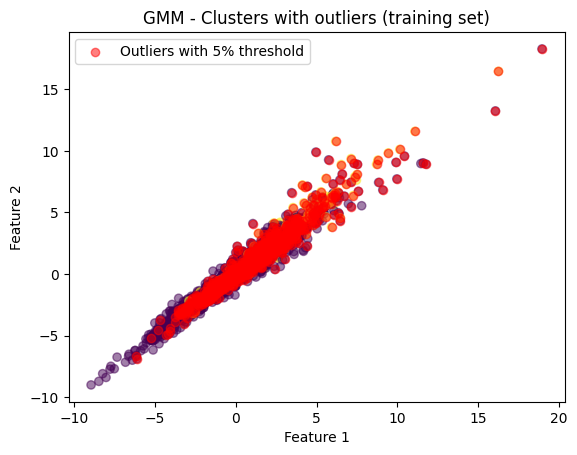

In [209]:
# Plotting clusters for train data with custom colors
plt.scatter(combined_data_train[:, 0], combined_data_train[:, 1], c=train_predicted_labels, alpha=0.5)

# Plotting outliers for Cluster 1 (low and high threshold)
plt.scatter(gmm_outliers_train[:, 0], gmm_outliers_train[:, 1], color='red', alpha=0.5, label='Outliers with 5% threshold')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GMM - Clusters with outliers (training set)')
plt.legend()
plt.savefig('GMM_clusters_outliers_train.png', dpi=300, bbox_inches='tight')
plt.show()

In [211]:
gmm_outlier_indices_train =  np.where(probabilities_train_gmm < threshold_train_gmm)

In [212]:
valid_indices_train_gmm = gmm_outlier_indices_train[0][(gmm_outlier_indices_train[0] < len(latitudes_1d))]
# lon lat
outlier_coordinates_latitudes_train_gmm = latitudes_1d[valid_indices_train_gmm]
outlier_coordinates_longitudes_train_gmm = longitudes_1d[valid_indices_train_gmm]

# Create a list of Point objects from the outlier coordinates
outlier_points_train_gmm = [Point(lon, lat) for lon, lat in zip(outlier_coordinates_longitudes_train_gmm, outlier_coordinates_latitudes_train_gmm)]

# Convert the outlier points to a GeoDataFrame
outlier_points_gdf_train_gmm = gpd.GeoDataFrame(geometry=outlier_points_train_gmm, crs=Indian_states.crs)

# Perform a spatial join between Indian_states and the outlier points GeoDataFrame
outliers_within_states_train_gmm = gpd.sjoin(outlier_points_gdf_train_gmm, Indian_states, op='within')

# Extract the coordinates of outliers within Indian states
outlier_within_latitudes_train_gmm = outliers_within_states_train_gmm.geometry.y.values
outlier_within_longitudes_train_gmm = outliers_within_states_train_gmm.geometry.x.values

/Users/shakidi/opt/anaconda3/envs/imports_TM/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


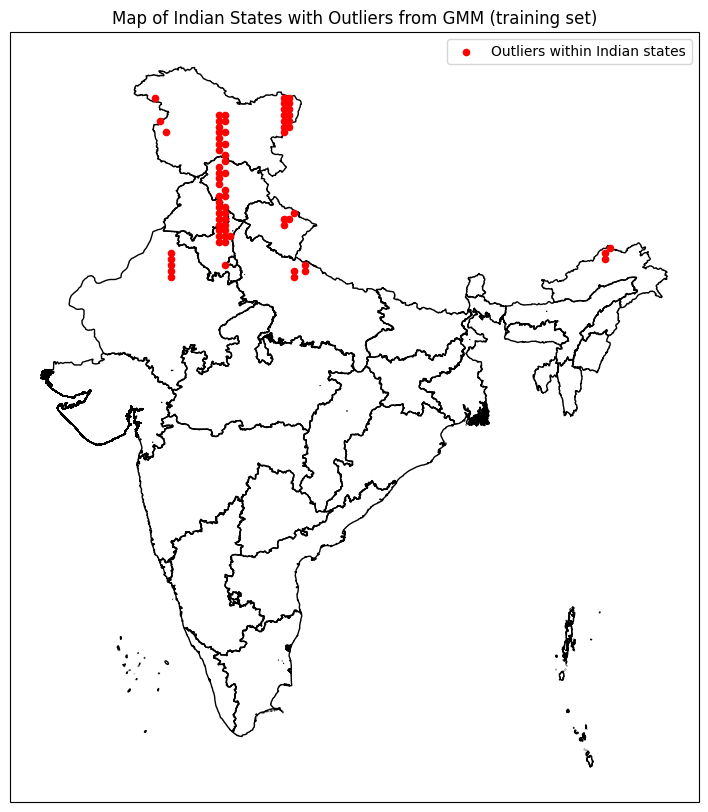

In [213]:
# Plot outliers within Indian states on the map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot Indian states
Indian_states.plot(ax=ax, facecolor='none', edgecolor='black')

# Plot outliers within Indian states on the map
ax.scatter(outlier_within_longitudes_train_gmm, outlier_within_latitudes_train_gmm, color='red', s=20, label='Outliers within Indian states')

ax.set_title('Map of Indian States with Outliers from GMM (training set)')
ax.legend()
plt.show()

# Save the plot to a file
fig.savefig('Outliers_train_gmm_fig.png', dpi=300, bbox_inches='tight')

In [215]:
len(outliers_within_states_train_gmm)

70

6.4 - Test the model

In [216]:
test_predicted_labels = gmm.predict(combined_data_test)

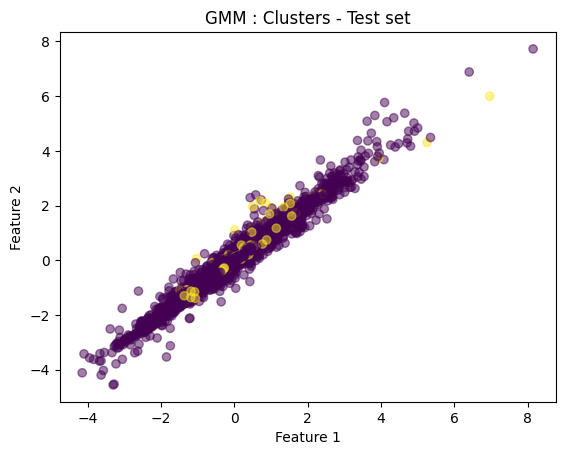

In [218]:
# Plotting clusters 
plt.scatter(combined_data_test[:, 0], combined_data_test[:, 1], c=test_predicted_labels, alpha=0.5)
plt.title('GMM : Clusters - Test set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig('GMM_clusters_test.png', dpi=300, bbox_inches='tight')
plt.show()

In [219]:
# Get the probabilities for each point in the train data
probabilities_test_gmm = gmm.score_samples(combined_data_test)

# Set a threshold for outlier probabilities
threshold_test_gmm = np.percentile(probabilities_test_gmm, 5)

# Identify outliers based on the probability threshold
gmm_outliers_test = combined_data_test[probabilities_test_gmm < threshold_test_gmm]

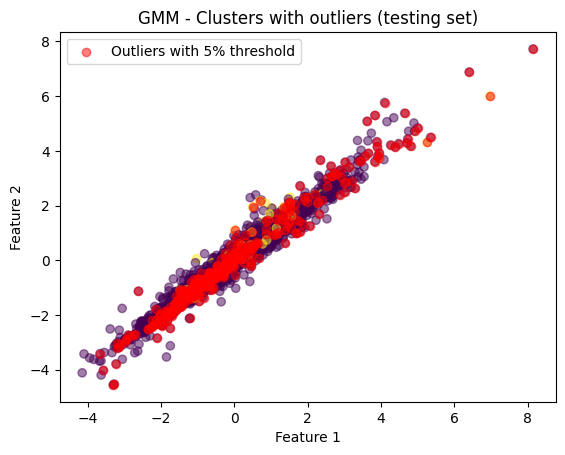

In [220]:
# Plotting clusters for train data with custom colors
plt.scatter(combined_data_test[:, 0], combined_data_test[:, 1], c=test_predicted_labels, alpha=0.5)

# Plotting outliers for Cluster 1 (low and high threshold)
plt.scatter(gmm_outliers_test[:, 0], gmm_outliers_test[:, 1], color='red', alpha=0.5, label='Outliers with 5% threshold')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GMM - Clusters with outliers (testing set)')
plt.legend()
plt.savefig('GMM_clusters_outliers_test.png', dpi=300, bbox_inches='tight')
plt.show()

In [221]:
gmm_outlier_indices_test =  np.where(probabilities_test_gmm < threshold_test_gmm)

In [222]:
valid_indices_test_gmm = gmm_outlier_indices_test[0][(gmm_outlier_indices_test[0] < len(latitudes_1d))]
# lon lat
outlier_coordinates_latitudes_test_gmm = latitudes_1d[valid_indices_test_gmm]
outlier_coordinates_longitudes_test_gmm = longitudes_1d[valid_indices_test_gmm]

# Create a list of Point objects from the outlier coordinates
outlier_points_test_gmm = [Point(lon, lat) for lon, lat in zip(outlier_coordinates_longitudes_test_gmm, outlier_coordinates_latitudes_test_gmm)]

# Convert the outlier points to a GeoDataFrame
outlier_points_gdf_test_gmm = gpd.GeoDataFrame(geometry=outlier_points_test_gmm, crs=Indian_states.crs)

# Perform a spatial join between Indian_states and the outlier points GeoDataFrame
outliers_within_states_test_gmm = gpd.sjoin(outlier_points_gdf_test_gmm, Indian_states, op='within')

# Extract the coordinates of outliers within Indian states
outlier_within_latitudes_test_gmm = outliers_within_states_test_gmm.geometry.y.values
outlier_within_longitudes_test_gmm = outliers_within_states_test_gmm.geometry.x.values

/Users/shakidi/opt/anaconda3/envs/imports_TM/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


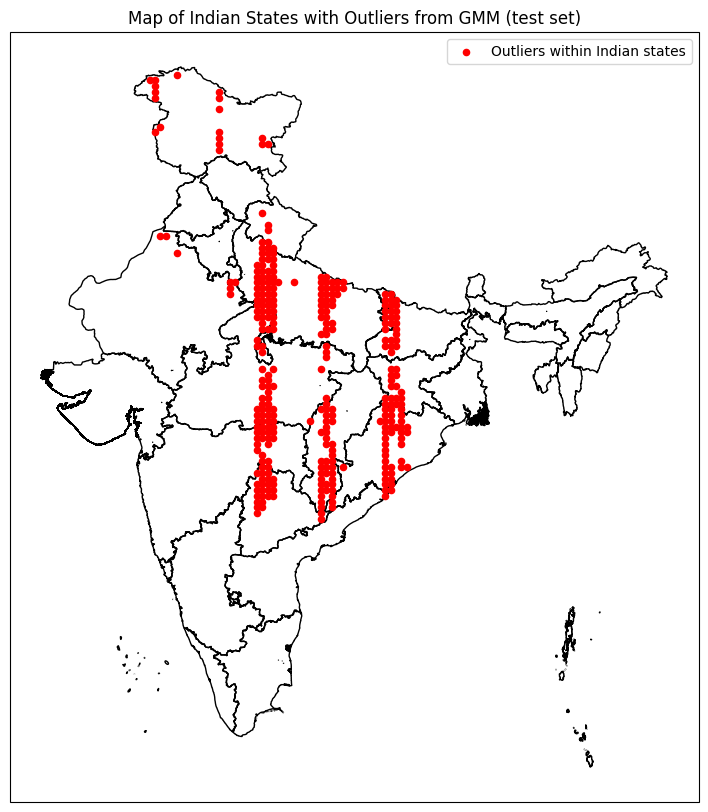

In [223]:
# Plot outliers within Indian states on the map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot Indian states
Indian_states.plot(ax=ax, facecolor='none', edgecolor='black')

# Plot outliers within Indian states on the map
ax.scatter(outlier_within_longitudes_test_gmm, outlier_within_latitudes_test_gmm, color='red', s=20, label='Outliers within Indian states')

ax.set_title('Map of Indian States with Outliers from GMM (test set)')
ax.legend()
plt.show()

# Save the plot to a file (e.g., PNG format)
fig.savefig('Outliers_test_gmm.png', dpi=300, bbox_inches='tight')

In [224]:
len(outliers_within_states_test_gmm)

320

silhouette score

In [225]:
from sklearn.metrics import silhouette_score

# GMM Evaluation
train_predicted_labels = gmm.predict(combined_data_train)
test_predicted_labels = gmm.predict(combined_data_test)
val_predicted_labels = gmm.predict(combined_data_val)

# Silhouette Score
train_silhouette = silhouette_score(combined_data_train, train_predicted_labels)
test_silhouette = silhouette_score(combined_data_test, test_predicted_labels)
val_silhouette = silhouette_score(combined_data_val, val_predicted_labels)

print("GMM Silhouette Scores:")
print(f"Training Set: {train_silhouette}")
print(f"Test Set: {test_silhouette}")
print(f"Validation Set: {val_silhouette}")

GMM Silhouette Scores:
Training Set: 0.4923090636730194
Test Set: 0.4716413617134094
Validation Set: 0.5034929513931274


---
Part 7 

7.1 -  Tune the hyperparameters with validation set - nu and kernel

7.1.1 - Using validation set to tune the hyperparameter nu

In [226]:
# import for one-class SVM
from sklearn.svm import OneClassSVM

In [227]:
# hyperparameter tuning for "nu"
nu_values = [0.0005, 0.001, 0.005, 0.01, 0.05]
best_nu = None
best_outlier_count = len(combined_data_val)  
for nu in nu_values:
    # Initialize and fit the One-Class SVM model
    svm_model = OneClassSVM(kernel='rbf', nu=nu)
    svm_model.fit(combined_data_train)

    # Predict outliers for validation set
    val_outliers = svm_model.predict(combined_data_val)

    # Count number of outliers in validation set
    val_outliers_count = np.sum(val_outliers == -1)

    # Update best hyperparameters if this 'nu' value yields fewer outliers
    if val_outliers_count < best_outlier_count:
        best_outlier_count = val_outliers_count
        best_nu = nu

print("Best 'nu' value:", best_nu)

Best 'nu' value: 0.0005


7.1.2 - Using validation set to tune the hyperparameter kernel and gamma

#Hyperparameter tuning for Kernel and gamma_values

kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_values = [0.1, 1, 10]  

best_kernel = None
best_gamma = None
best_outlier_count = len(combined_data_val)  # Initialize with a high value

for kernel in kernel_values:
    for gamma in gamma_values:
        # Initialize and fit the One-Class SVM model
        svm_model = OneClassSVM(kernel=kernel, gamma=gamma)
        svm_model.fit(combined_data_train)

        # Predict outliers for validation set
        val_outliers = svm_model.predict(combined_data_val)

        # Count number of outliers in validation set
        val_outliers_count = np.sum(val_outliers == -1)

        # Update best hyperparameters if this combination yields fewer outliers
        if val_outliers_count < best_outlier_count:
            best_outlier_count = val_outliers_count
            best_kernel = kernel
            best_gamma = gamma

print("Best 'kernel' value:", best_kernel)
print("Best 'gamma' value:", best_gamma)

--> took about 30 mins and still running

7.2 - Train the model

In [228]:
# Retrain the model with the best 'nu' and 'kernel'
best_svm_model = OneClassSVM(kernel='rbf', nu=best_nu)
best_svm_model.fit(combined_data_train)

# Predict outliers for train set
OC_outliers_train = best_svm_model.predict(combined_data_train)

In [229]:
OC_outlier_indices_train = np.where(OC_outliers_train == -1)

In [231]:
# plot on India map
valid_indices_train_OC = OC_outlier_indices_train[0][(OC_outlier_indices_train[0] < len(latitudes_1d))]
# lon lat
outlier_coordinates_latitudes_train_OC = latitudes_1d[valid_indices_train_OC]
outlier_coordinates_longitudes_train_OC = longitudes_1d[valid_indices_train_OC]

# Create a list of Point objects from the outlier coordinates
outlier_points_train_OC = [Point(lon, lat) for lon, lat in zip(outlier_coordinates_longitudes_train_OC, outlier_coordinates_latitudes_train_OC)]

# Convert the outlier points to a GeoDataFrame
outlier_points_gdf_train_OC = gpd.GeoDataFrame(geometry=outlier_points_train_OC, crs=Indian_states.crs)

# Perform a spatial join between Indian_states and the outlier points GeoDataFrame
outliers_within_states_train_OC = gpd.sjoin(outlier_points_gdf_train_OC, Indian_states, op='within')

# Extract the coordinates of outliers within Indian states
outlier_within_latitudes_train_OC = outliers_within_states_train_OC.geometry.y.values
outlier_within_longitudes_train_OC = outliers_within_states_train_OC.geometry.x.values

/Users/shakidi/opt/anaconda3/envs/imports_TM/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


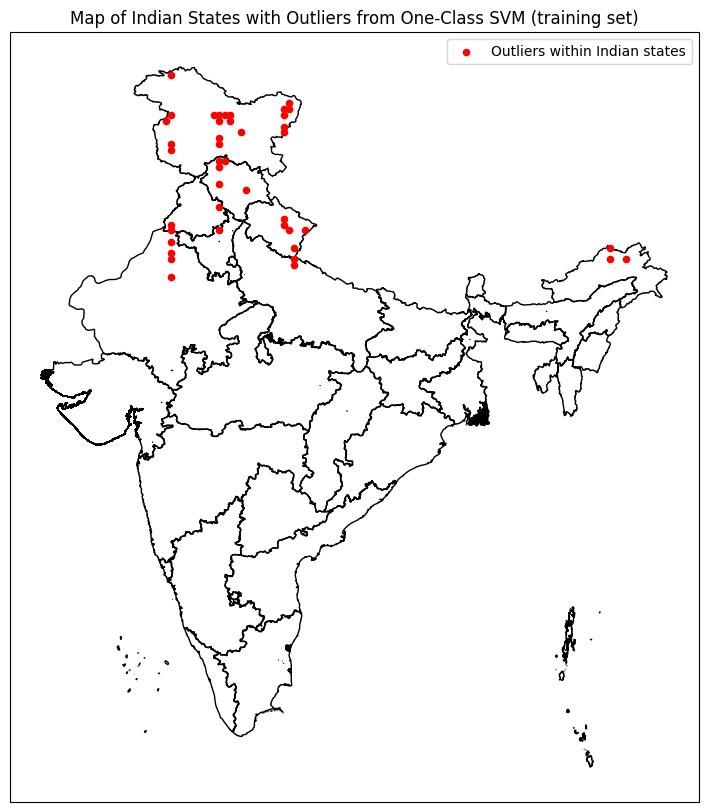

In [233]:
# Plot outliers within Indian states on the map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot Indian states
Indian_states.plot(ax=ax, facecolor='none', edgecolor='black')

# Plot outliers within Indian states on the map
ax.scatter(outlier_within_longitudes_train_OC, outlier_within_latitudes_train_OC, color='red', s=20, label='Outliers within Indian states')

ax.set_title('Map of Indian States with Outliers from One-Class SVM (training set)')
ax.legend()
plt.show()

# Save the plot to a file (e.g., PNG format)
fig.savefig('Outliers_train_OC.png', dpi=300, bbox_inches='tight')

In [234]:
len(outliers_within_states_train_OC)

43

7.3 - Test the model

In [242]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import seaborn as sns

In [235]:
# Predict outliers for train set
OC_outliers_test = best_svm_model.predict(combined_data_test)

In [236]:
OC_outlier_indices_test = np.where(OC_outliers_test == -1)

In [238]:
# plot on India map
valid_indices_test_OC = OC_outlier_indices_test[0][(OC_outlier_indices_test[0] < len(latitudes_1d))]
# lon lat
outlier_coordinates_latitudes_test_OC = latitudes_1d[valid_indices_test_OC]
outlier_coordinates_longitudes_test_OC = longitudes_1d[valid_indices_test_OC]

# Create a list of Point objects from the outlier coordinates
outlier_points_test_OC = [Point(lon, lat) for lon, lat in zip(outlier_coordinates_longitudes_test_OC, outlier_coordinates_latitudes_test_OC)]

# Convert the outlier points to a GeoDataFrame
outlier_points_gdf_test_OC = gpd.GeoDataFrame(geometry=outlier_points_test_OC, crs=Indian_states.crs)

# Perform a spatial join between Indian_states and the outlier points GeoDataFrame
outliers_within_states_test_OC = gpd.sjoin(outlier_points_gdf_test_OC, Indian_states, op='within')

# Extract the coordinates of outliers within Indian states
outlier_within_latitudes_test_OC = outliers_within_states_test_OC.geometry.y.values
outlier_within_longitudes_test_OC = outliers_within_states_test_OC.geometry.x.values

/Users/shakidi/opt/anaconda3/envs/imports_TM/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


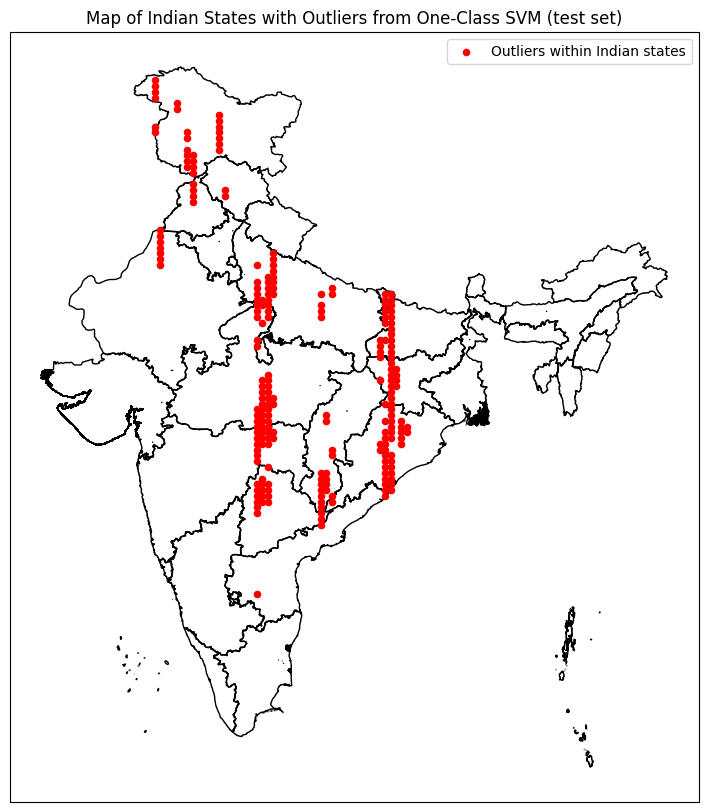

In [240]:
# Plot outliers within Indian states on the map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot Indian states
Indian_states.plot(ax=ax, facecolor='none', edgecolor='black')

# Plot outliers within Indian states on the map
ax.scatter(outlier_within_longitudes_test_OC, outlier_within_latitudes_test_OC, color='red', s=20, label='Outliers within Indian states')

ax.set_title('Map of Indian States with Outliers from One-Class SVM (test set)')
ax.legend()
plt.show()

# Save the plot to a file (e.g., PNG format)
fig.savefig('Outliers_test_OC.png', dpi=300, bbox_inches='tight')

In [241]:
len(outliers_within_states_test_OC)

221

Confusion Matrix:
[[   0    0]
 [ 349 8579]]


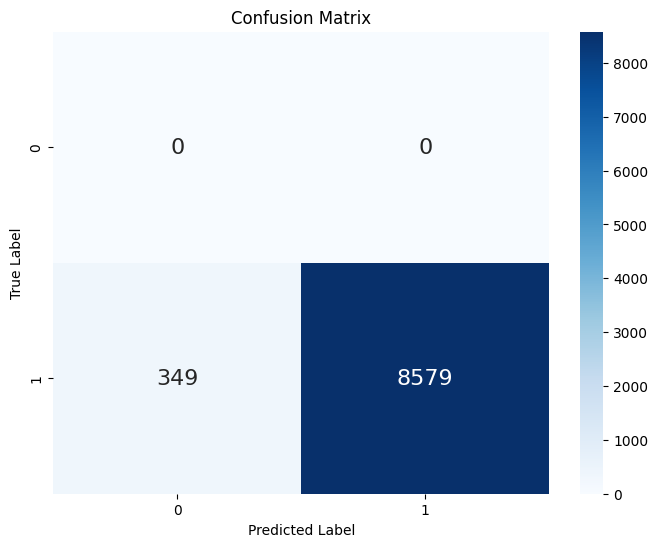

In [243]:
# Confusion Matrix
conf_matrix = confusion_matrix(np.ones_like(OC_outliers_test), OC_outliers_test)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save the plot to a file 
fig.savefig('conf_matrix.png', dpi=300, bbox_inches='tight')

In [244]:
# Get decision function scores (if available) for AUC-ROC calculation
if hasattr(svm_model, "decision_function"):
    decision_scores = svm_model.decision_function(combined_data_test)
else:
    decision_scores = svm_model.predict(combined_data_test)

/Users/shakidi/opt/anaconda3/envs/imports_TM/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1124: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


AUC-ROC: nan


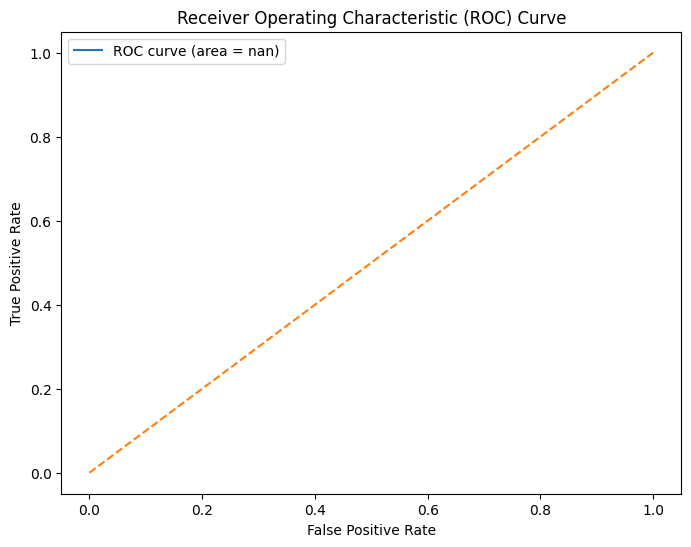

In [245]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(np.ones_like(OC_outliers_test), decision_scores)
roc_auc = auc(fpr, tpr)
print("AUC-ROC:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Save the plot to a file 
fig.savefig('ROC.png', dpi=300, bbox_inches='tight')

AUC-PR: 1.0


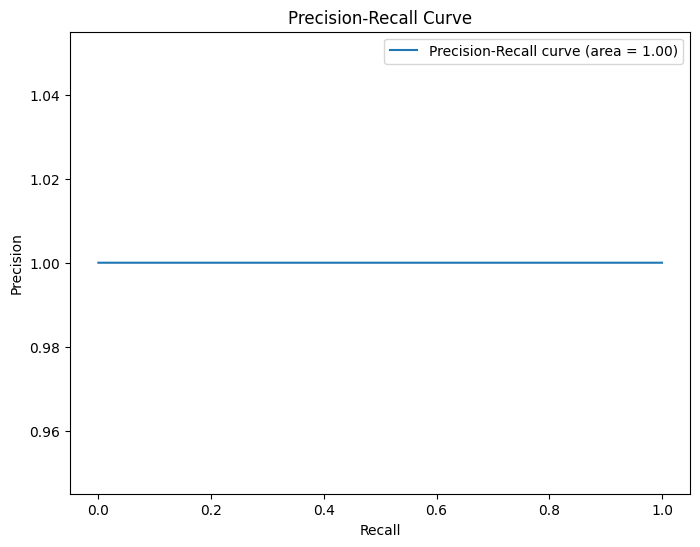

In [246]:
# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(np.ones_like(OC_outliers_test), decision_scores)
pr_auc = auc(recall, precision)
print("AUC-PR:", pr_auc)
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Save the plot to a file 
fig.savefig('PR_curve.png', dpi=300, bbox_inches='tight')